In [1]:
from tensorflow.keras.datasets import mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices)

<function list_local_devices at 0x00000171B40B34C0>


In [3]:
print("Initial shape or dimensions of x_train", str(x_train.shape))

print ("Number of samples in our training data: " + str(len(x_train)))
print ("Number of labels in our training data: " + str(len(y_train)))
print ("Number of samples in our test data: " + str(len(x_test)))
print ("Number of labels in our test data: " + str(len(y_test)))

print("\n")
print ("Dimensions of x_train:" + str(x_train[0].shape))
print ("Labels in x_train:" + str(y_train.shape))
print("\n")
print ("Dimensions of x_test:" + str(x_test[0].shape))
print ("Labels in y_test:" + str(y_test.shape))

Initial shape or dimensions of x_train (60000, 28, 28)
Number of samples in our training data: 60000
Number of labels in our training data: 60000
Number of samples in our test data: 10000
Number of labels in our test data: 10000


Dimensions of x_train:(28, 28)
Labels in x_train:(60000,)


Dimensions of x_test:(28, 28)
Labels in y_test:(10000,)


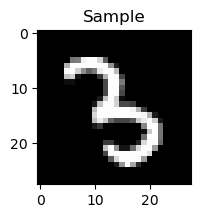

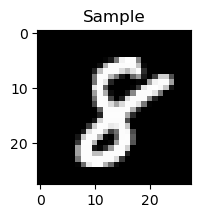

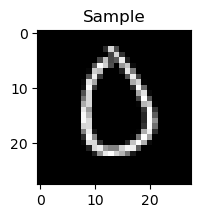

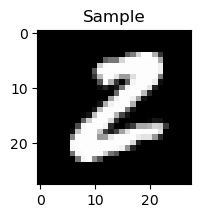

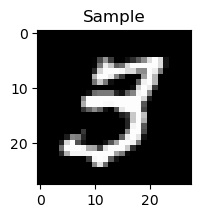

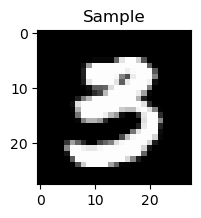

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def imshow(title, image = None, size = 6):
    if (image.any()):
        w,h = image.shape[0], image.shape[1]
        aspect_ratio = w/h
        plt.figure(figsize = (size*aspect_ratio, size))
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title(title)

    else:
        print("Image not Found")
        
for i in range(0,6):
    random_num = np.random.randint(0, len(x_train))
    img = x_train[random_num]
    imshow("Sample", img, size = 2)

<Figure size 640x480 with 0 Axes>

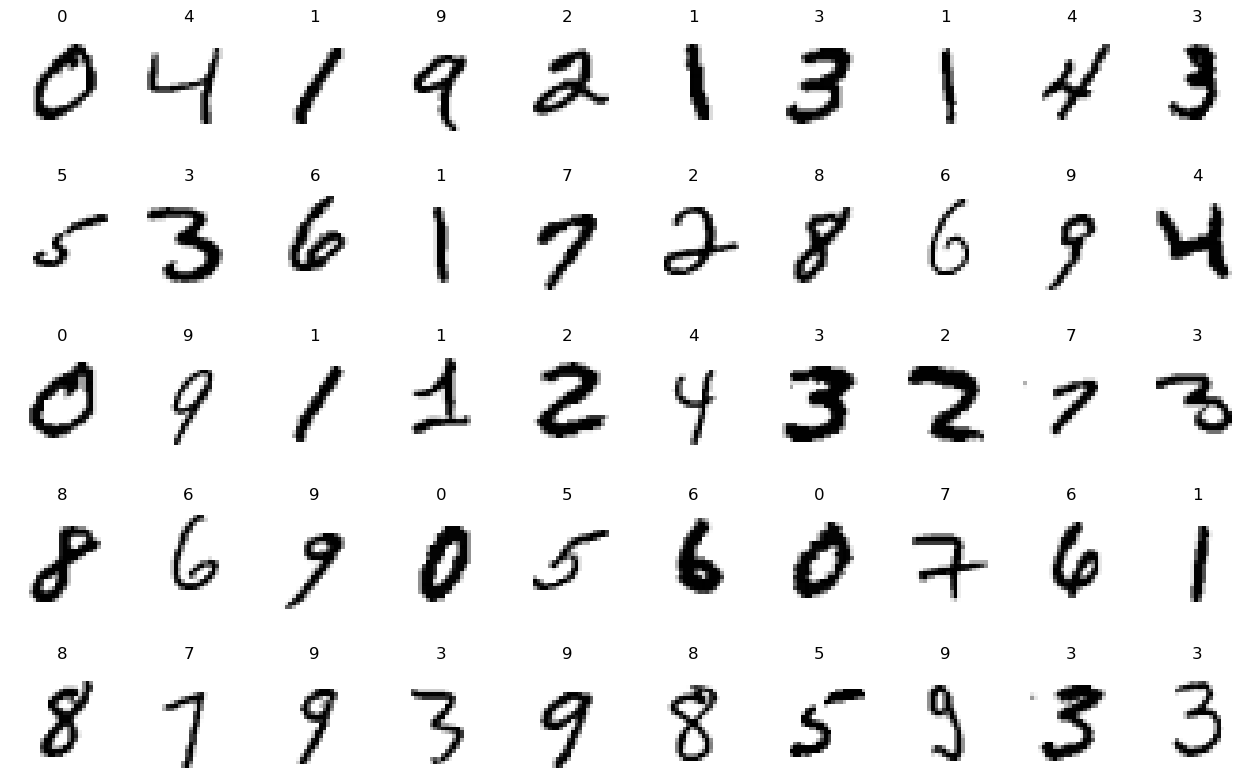

In [5]:
import matplotlib.pyplot as plt

figure = plt.figure()
plt.figure(figsize=(16,10))

noi = 50

for index in range(1, noi+1):
    plt.subplot(5,10,index).set_title(f'{y_train[index]}')
    plt.axis("off")
    plt.imshow(x_train[index], cmap='gray_r')

In [6]:
x_train = x_train.reshape(x_train.shape[0], x_train[0].shape[0], x_train[0].shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test[0].shape[0], x_test[0].shape[1], 1)

input_shape = (x_train[0].shape[0], x_train[0].shape[1], 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255.0
x_test /= 255.0

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [7]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print ("Number of Classes: " + str(y_test.shape[1]))

num_classes = y_test.shape[1]
num_pixels = x_train.shape[1] * x_train.shape[2]

Number of Classes: 10


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras import backend as k
from tensorflow.keras.optimizers import SGD

model=Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss= 'categorical_crossentropy',
             optimizer= SGD(0.001),
              metrics= ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

In [9]:
batch_size = 128
epochs = 25

history = model.fit(x_train,
                   y_train,
                   batch_size= batch_size,
                   epochs= epochs,
                   verbose= 1,
                   validation_data= (x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print(score)

Epoch 1/25
469/469 [==============================] - 19s 39ms/step - loss: 2.1576 - accuracy: 0.4227 - val_loss: 1.9388 - val_accuracy: 0.5802
Epoch 2/25
469/469 [==============================] - 17s 37ms/step - loss: 1.4034 - accuracy: 0.7268 - val_loss: 0.8247 - val_accuracy: 0.8260
Epoch 3/25
469/469 [==============================] - 18s 38ms/step - loss: 0.6181 - accuracy: 0.8490 - val_loss: 0.4678 - val_accuracy: 0.8775
Epoch 4/25
469/469 [==============================] - 18s 38ms/step - loss: 0.4357 - accuracy: 0.8796 - val_loss: 0.3779 - val_accuracy: 0.8921
Epoch 5/25
469/469 [==============================] - 17s 37ms/step - loss: 0.3750 - accuracy: 0.8933 - val_loss: 0.3361 - val_accuracy: 0.9039
Epoch 6/25
469/469 [==============================] - 17s 37ms/step - loss: 0.3435 - accuracy: 0.8994 - val_loss: 0.3123 - val_accuracy: 0.9093
Epoch 7/25
469/469 [==============================] - 17s 37ms/step - loss: 0.3231 - accuracy: 0.9057 - val_loss: 0.2953 - val_accuracy:

In [10]:
history_dict = history.history
history_dict

{'loss': [2.157557725906372,
  1.4033886194229126,
  0.6181464791297913,
  0.4356972277164459,
  0.37500178813934326,
  0.34347647428512573,
  0.323112428188324,
  0.30758899450302124,
  0.294651061296463,
  0.2831074297428131,
  0.2730093002319336,
  0.26351580023765564,
  0.25493597984313965,
  0.2468593269586563,
  0.23970559239387512,
  0.2324640452861786,
  0.22596289217472076,
  0.219822496175766,
  0.21392236649990082,
  0.2084163874387741,
  0.2030615508556366,
  0.19803811609745026,
  0.19305115938186646,
  0.18823830783367157,
  0.1836688220500946],
 'accuracy': [0.422650009393692,
  0.7267500162124634,
  0.8489999771118164,
  0.8796166777610779,
  0.8933333158493042,
  0.8994166851043701,
  0.9057333469390869,
  0.9102333188056946,
  0.9139500260353088,
  0.9169166684150696,
  0.9196166396141052,
  0.9224166870117188,
  0.9252499938011169,
  0.9268500208854675,
  0.9291999936103821,
  0.9316333532333374,
  0.9337166547775269,
  0.9350833296775818,
  0.9367333054542542,
  0.9

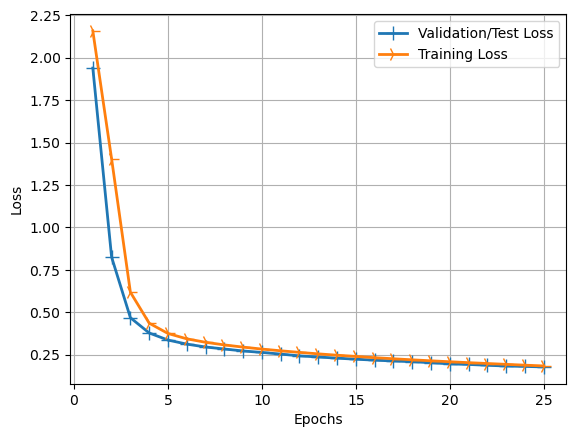

In [11]:
# Plotting our loss charts
import matplotlib.pyplot as plt

# Use the History object we created to get our saved performance results
history_dict = history.history

# Extract the loss and validation losses
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

# Get the number of epochs and create an array up to that number using range()
epochs = range(1, len(loss_values) + 1)

# Plot line charts for both Validation and Training Loss
line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

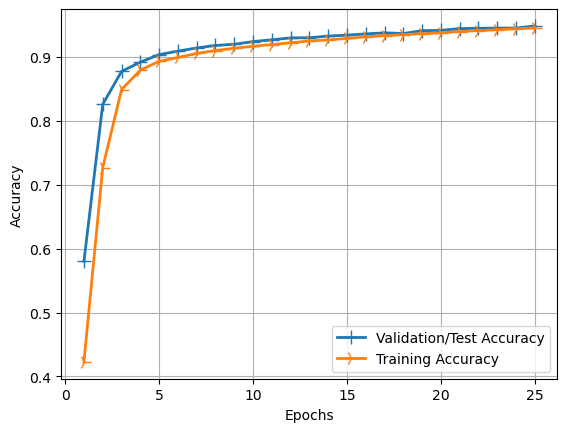

In [12]:
import matplotlib.pyplot as plt

history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

In [13]:
model.save("mnist_simple_cnn_10_Epochs.h5")
print("Model Saved")

Model Saved


In [14]:
from tensorflow.keras.models import load_model

classifier = load_model('mnist_simple_cnn_10_Epochs.h5')

In [15]:
print(x_test.shape)

print("Predicting classes for all 10,000 test images...")

pred = np.argmax(classifier.predict(x_test), axis=-1)
print("Completed.\n")

print(pred)
print(type(pred))
print(len(pred))

(10000, 28, 28, 1)
Predicting classes for all 10,000 test images...
313/313 [==============================] - 4s 7ms/step
Completed.

[7 2 1 ... 4 5 6]
<class 'numpy.ndarray'>
10000


In [16]:
input_im = x_test[0]
print(input_im.shape)

input_im = input_im.reshape(1,28,28,1) 
print(input_im.shape)

pred = np.argmax(classifier.predict(input_im), axis=-1)
print(pred)
print(type(pred))
print(len(pred))

(28, 28, 1)
(1, 28, 28, 1)
1/1 [==============================] - 0s 24ms/step
[7]
<class 'numpy.ndarray'>
1


1/1 [==============================] - 0s 16ms/step


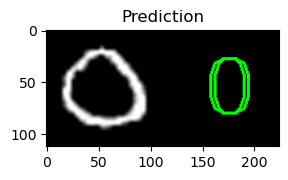

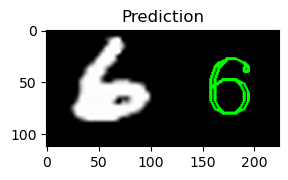

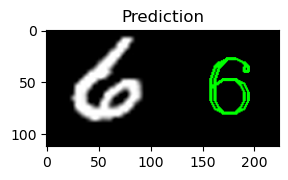

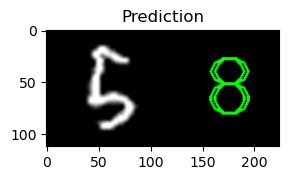

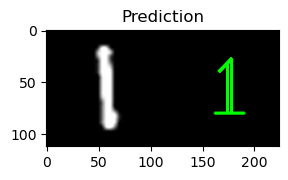

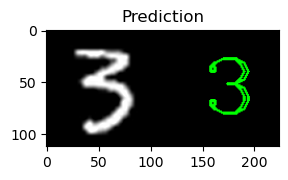

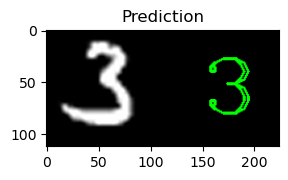

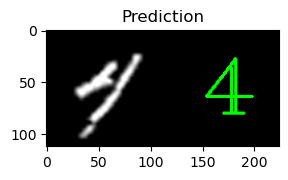

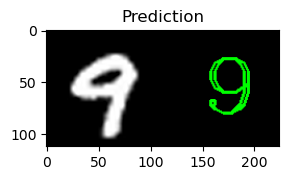

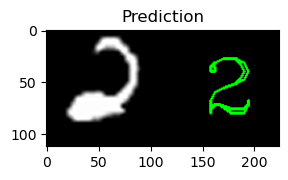

In [17]:
import cv2
import numpy as np

(x_train, y_train), (x_test, y_test)  = mnist.load_data()

def draw_test(name, pred, input_im):  
    '''Function that places the predicted class next to the original image'''
    BLACK = [0,0,0]
    expanded_image = cv2.copyMakeBorder(input_im, 0, 0, 0, imageL.shape[0] ,cv2.BORDER_CONSTANT,value=BLACK)
    expanded_image = cv2.cvtColor(expanded_image, cv2.COLOR_GRAY2BGR)
    cv2.putText(expanded_image, str(pred), (150, 80) , cv2.FONT_HERSHEY_COMPLEX_SMALL, 4, (0,255,0), 2)
    imshow(name, expanded_image)

for i in range(0,10):
    rand = np.random.randint(0,len(x_test))
    input_im = x_test[rand]

    imageL = cv2.resize(input_im, None, fx=4, fy=4, interpolation = cv2.INTER_CUBIC)
    
    res = str(np.argmax(classifier.predict(input_im), axis=-1)[0])

    draw_test("Prediction", res,  np.uint8(imageL)) 